## 1. Data Preparation
- Import libs
- Load data
- Quality check
- Normalize data

In [165]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [85]:
data = 'data\cardataset.csv'
df = pd.read_csv(data)

In [86]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [87]:
# Shape of data
df.shape

(11914, 16)

In [88]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [89]:
# Normalize data: lowercase column names and object values
df.columns=df.columns.str.lower().str.replace(' ','_')
obj_col = df.dtypes[df.dtypes == 'object'].index
obj_col_list = list(obj_col)
for i in obj_col_list:
    df[i] = df[i].str.lower().str.replace(' ','')

In [90]:
# missing value at column
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [91]:
df.nunique()

make                   48
model                 914
year                   28
engine_fuel_type       10
engine_hp             356
engine_cylinders        9
transmission_type       5
driven_wheels           4
number_of_doors         3
market_category        71
vehicle_size            3
vehicle_style          16
highway_mpg            59
city_mpg               69
popularity             48
msrp                 6049
dtype: int64

## 2. EDA

In [92]:
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


### 2.1.Check price distribution

C:\Users\v121256\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

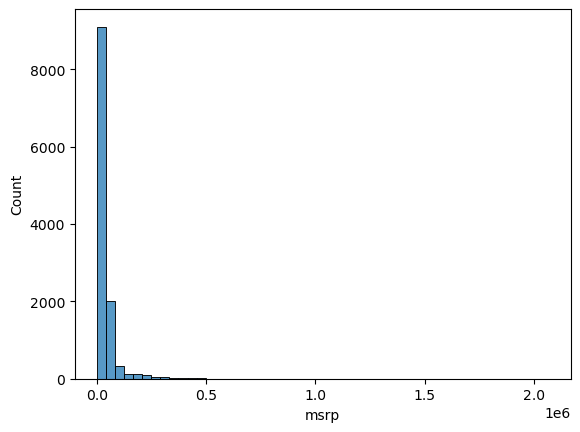

In [93]:
sns.histplot(data = df.msrp, bins = 50)

In [94]:
# Descriptive Statistics
df_price = df['msrp']
print('Skew of price:', df_price.skew())
print('Min of price:', df_price.min())
print('Max of price:', df_price.max())
print('Median:', df_price.median())
print('Mode:', df_price.mode())
print('Mean:', df_price.mean())

Skew of price: 11.771987129334972
Min of price: 2000
Max of price: 2065902
Median: 29995.0
Mode: 0    2000
Name: msrp, dtype: int64
Mean: 40594.737032063116


C:\Users\v121256\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

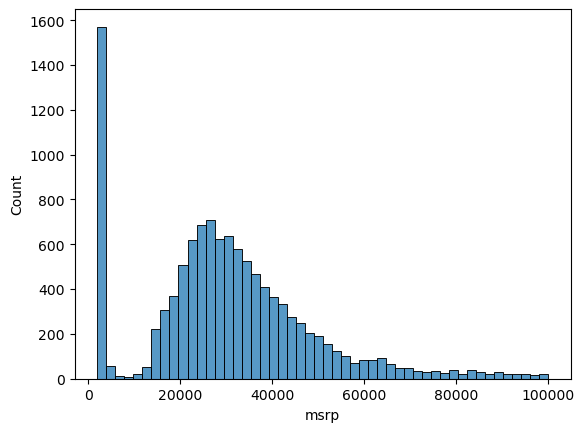

In [95]:
sns.histplot(data = df.msrp[df.msrp <100000], bins = 50)

=> **The distribution is skewed to the right which means the majority of car price falled at lower range. Therefore, we can use logarithm distribution to describe the data**

C:\Users\v121256\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

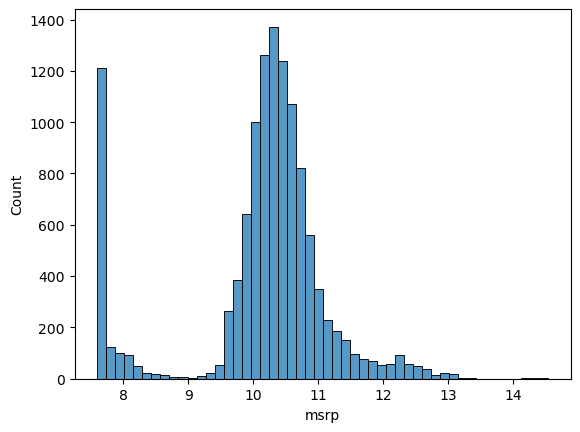

In [96]:
# Log series distribution
price_log = np.log1p(df.msrp)
sns.histplot(data = price_log, bins = 50)

### 2.2. Check Outliers of Price

In [97]:
# Calculate Q1, Q3, IQR

df_q1 = df['msrp'].quantile(0.25)
df_q3 = df['msrp'].quantile(0.75)
iqr = df_q3 - df_q1
lower_bound = df_q1 - iqr*1.5
upper_bound = df_q3 + iqr*1.5
print('lower bound: ', lower_bound)
print('upper bound: ',upper_bound)

lower bound:  -10846.875
upper bound:  74078.125


**Since lower bound is negative and we found that the majority of data set is righ-skew, we will only exam the data with extreme high price**

In [98]:
# Ratio of extreme high price

outlier_ratio = round(df[df['msrp'] >=upper_bound].shape[0]/ df.shape[0],2)
outlier_ratio

0.08

In [99]:
df_outlier = df[df['msrp'] >= upper_bound]
df_outlier['make'].value_counts()

make
mercedes-benz    105
porsche           96
bmw               95
astonmartin       93
cadillac          87
bentley           74
ferrari           69
maserati          54
lamborghini       52
audi              50
landrover         49
rolls-royce       31
chevrolet         22
lexus             19
dodge             18
maybach           16
tesla             13
lotus             11
volkswagen         8
nissan             8
acura              5
mclaren            5
lincoln            4
toyota             3
spyker             3
bugatti            3
ford               2
infiniti           1
Name: count, dtype: int64

In [100]:
#Remove Outliers
sample = df[df['msrp']< upper_bound]

## 3. Data Splitting  

 *We need to hold-on method to split the data set*

In [101]:
#Split data into Train set, Validation set, Test set with ration 6:2:2 respectively
np.random.seed(2)
# number of sample
n = len(sample)
index_arr = np.arange(n)
np.random.shuffle(index_arr)
sample =sample.iloc[index_arr]

#number of train, validation, test set
n_train = int(n*0.6)
n_validation = int(n*0.2)
n_test = int(n*0.2)

#split data sets

df_train_org = sample.iloc[:n_train].copy()
df_val_org = sample.iloc[n_train: n_train+n_validation].copy()
df_test_org = sample.iloc[n_train+n_validation:].copy()

#split target vectors and feature matrix

y_train_org = df_train_org['msrp'].values
y_val_org = df_val_org['msrp'].values
y_test_org = df_test_org['msrp'].values




## 4.Linear Regression Model

Define a function named linear_regression_model which based on Nornmal Equation andnd return the correlation matrix <br>
Normal Equation: $$ w = (X^TX)^-1X^Ty $$

In [131]:
def linear_regression_model(feature_matrix, target_vector):
    X= feature_matrix
    y =target_vector
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    w_0 = w[0]
    w_i = w[1:]
    return w_0, w_i

# 5. Baseline solution

In [151]:
# Prepare X matrix
def prepare_X(df, feature):
    df['age'] = 2017 - df.year
    feature = feature + ['age']
    df_num = df[feature]
    df_num = df_num.fillna(0)
    
    X = df_num.values
    return X 

In [152]:
#only keep numeric columns as feature matrix
feature_names = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
X_train_org = prepare_X(df_train_org, feature_names)

In [153]:
w_0, w_i=linear_regression_model(X_train_org, y_train_org)
y_pred = w_0 + X_train_org.dot(w_i)


C:\Users\v121256\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\v121256\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

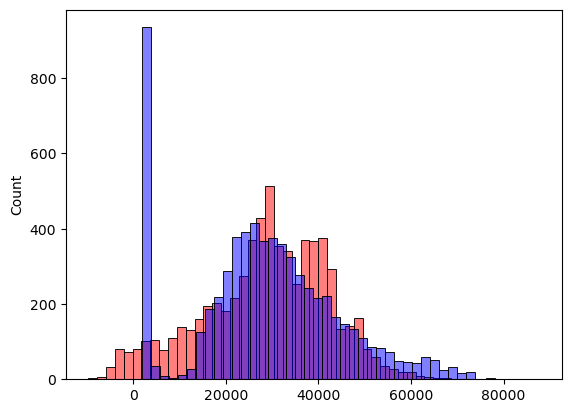

In [154]:
sns.histplot(y_pred, color='r', alpha = 0.5)
sns.histplot(y_train_org, color = 'b', alpha = 0.5)

In [161]:
model = LinearRegression()
fit = model.fit(X_train_org, y_train_org)
pred = model.predict(X_train_org)

# 6.RMSE

In [155]:
def rmse( y_target,y_pred):
    error =y_target- y_pred 
    se = error**2
    mse = se.mean()
    return np.sqrt(mse)

In [156]:
rmse(y_pred,y_train_org)

8312.510442725728

# 7. Categorical variables

In [159]:
df_train_org.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
age                    int64
dtype: object

In [ ]:
for i in [